In [ ]:
import matplotlib.pyplot as plt
plt.style.use('../styles/gcpeixoto-book.mplstyle')

(cap:relacoes)=
# Relações

<div class="chapter-thumb">
    <div class="chapter-oa">
        <h2>Objetivos de aprendizagem</h2>
        <ul>
        <li>Modelar problemas reais utilizando produto cartesiano e relações;</li>
	    <li>Interpretar representações gráficas de relações entre objetos;</li>
	    <li>Implementar matrizes de relacionamento a partir de fontes de dados diversas;</li>
	    <li>Reconhecer as propriedades fundamentais das relações e suas aplicações a sistemas de informação.</li>
        <li>Calcular a composição de múltiplas relações por meio do produto booleano de matrizes.</li>
        </ul>
    </div>        
    <div class="quote-box">
        <p><em> 
        </p></em>
    </div>        
</div>

## Relacionamento de dados

Na gestão pública de saúde, o registro de diagnósticos é fundamental para a montagem de políticas públicas eficientes. Consideremos o conjunto dos transtornos de cefaleia [na CID-11](https://icd.who.int/en) (Classificação Internacionais de Doença/OMS). A "enxaqueca" comum é mapeada pelo código **8A80**. A nevralgia do trigêmeo, um tipo de cefaleia secundária, é maepada pelo código **8B82.0**. Já o código **8A8Z** é utilizado para indicar transtornos de cefaleia não especificados. 

Em um banco de dados relacional do SUS, por exemplo, esses códigos são como "chaves" que estabelecem relações matemáticas fundamentais. Ao cruzarmos o conjunto de pacientes com o conjunto de códigos CID-11, criamos pares ordenados que permitem ao sistema automatizar desde a dispensação de medicamentos específicos até o agendamento de consultas com neurologistas, garantindo que a jornada de um paciente com dor crônica seja rastreável e integrada.

Estudar o conceito de relações é, portanto, entender a arquitetura lógica que sustenta esses sistemas de informação. Quando modelamos uma tabela onde um CPF está relacionado a múltiplos códigos CID-11, estamos manipulando subconjuntos do produto cartesiano entre a população e o catálogo de doenças. Essa estrutura nos permite aplicar propriedades como a composição de relações: ao conectarmos um paciente a um diagnóstico e, posteriormente, esse diagnóstico a um protocolo clínico de cefaleias, estamos realizando uma operação matemática que define o fluxo de cuidado. Nesta aula, aplicaremos o conceito de _relação matemática_ a situações como essas.

## Produto cartesiano e relações

O _produto cartesiano_ é um conjunto caracterizado como um universo de possibilidades para as relações matemáticas. Formalmente, ele é definido da seguinte forma:
$$A \times B = \{ (a,b) : a \in A \wedge b \in B\}, \quad A \neq \emptyset, \ \ B \neq \emptyset.$$

É fundamental enfatizar que a ordem importa. O par $(a,b)$ é diferente do par $(b,a)$, a menos que $a=b$. Para ilustrar o conceito, digamos que o $A$ seja um conjunto de pacientes e $B$ um conjunto de CIDs de cefaleia. O produto cartesiano $A \times B$ representaria todas as combinações teóricas de diagnósticos para os pacientes.

In [ ]:
import itertools

# Define conjuntos
pacientes = {"Ald", "Bob", "Cos", "Dub"}
cids_cefaleia = {"8A80", "8A81.2", "8A82", "8A85"}

# A X B
prod_cart = list(itertools.product(pacientes, cids_cefaleia))

print(f"Há {len(prod_cart)} pares possíveis:")
for par in prod_cart: print(par)

Há 16 pares possíveis:
('Bob', '8A81.2')
('Bob', '8A80')
('Bob', '8A82')
('Bob', '8A85')
('Dub', '8A81.2')
('Dub', '8A80')
('Dub', '8A82')
('Dub', '8A85')
('Cos', '8A81.2')
('Cos', '8A80')
('Cos', '8A82')
('Cos', '8A85')
('Ald', '8A81.2')
('Ald', '8A80')
('Ald', '8A82')
('Ald', '8A85')


Neste exemplo, não seria admissível o par `(8A80, Cos)` sem que houvesse uma modificação no sentido das instâncias.

### Relação binária

Uma _relação binária_ – ou simplesmente relação matemática daqui para frente – nada mais é do que um subconjunto de $A \times B$. Simbolicamente, dizemos que $\mathcal{R}$ é uma relação entre $A$ e $B$, se e somente se, $\mathcal{R} \subseteq A \times B$. Adicionalmente dizemos que $(a, b) \in \mathcal{R} \Leftrightarrow \mathcal{I}(P(a, b)) = T$, para uma propriedade $P(a, b)$. Usamos a notação:

- $a\mathcal{R}b$ para indicar que $(a, b) \in \mathcal{R}$ e
- $a\not\mathcal{R}b$ para indicar que $(a, b) \not\in \mathcal{R}$

Se $P(a,b)$ é tal que $b$ é um transtorno de cefaleia codificado por $a$ na CID-11, podemos representar $a\mathcal{R}b$ como:

In [ ]:
# Códigos CID-11 de cefaleias
A = ['8A80', 
     '8A80.0', 
     '8A81.0', 
     '8A81.2', 
     '8A82', 
     '8A84.2', 
     '8B20']

# Doenças correspondentes
B = ['Enxaqueca', 
     'Enxaqueca sem aura', 
     'Cefaleia tensional episódica',
     'Cefaleia em salvas (Cluster headache)',
     'Cefaleia trigemino-autonômica',
     'Cefaleia por uso excessivo de medicamentos',
     'Cefaleia secundária a trauma craniano']


# Relação R: Código -> Nome da Doença
R = {(a,b) for a,b in zip(A,B)}
print(*R, sep="\n")

('8A80', 'Enxaqueca')
('8A81.0', 'Cefaleia tensional episódica')
('8A84.2', 'Cefaleia por uso excessivo de medicamentos')
('8A80.0', 'Enxaqueca sem aura')
('8A81.2', 'Cefaleia em salvas (Cluster headache)')
('8B20', 'Cefaleia secundária a trauma craniano')
('8A82', 'Cefaleia trigemino-autonômica')


### Domínio e imagem

O conjunto $D_\mathcal{R}$ formado por todas as primeiras componentes dos pares ordenados de $\mathcal{R}$ é o seu _domínio_, ao passo que o conjunto $I_\mathcal{R}$ formado por todas as segundas componentes dos pares ordenados de $\mathcal{R}$ é a sua _imagem_. 

No exemplo anterior, poderíamos admitir $D_\mathcal{R}$ = $A$ e $I_\mathcal{R}$ = $B$. Por outro lado, suponhamos uma segunda relação $a\mathcal{S}b$ definida de modo que $P(a,b)$ é tal que $b$ é codificada por $a$ na CID-11 e $b$ é tipificada como enxaqueca. Neste caso:

In [ ]:
# Relação S: Códigos -> enxaquecas
S = {(a,b) for a,b in zip(A,B) if "Enxaqueca" in b}
print(*S, sep="\n")

D_S, I_S = {a for a,b in S}, {b for a,b in S}
print("Domínio de S:", D_S)
print("Imagem de S:", I_S)

('8A80', 'Enxaqueca')
('8A80.0', 'Enxaqueca sem aura')
Domínio de S: {'8A80', '8A80.0'}
Imagem de S: {'Enxaqueca', 'Enxaqueca sem aura'}


### Relação inversa

A relação inversa de $\mathcal{R}$, denotada por $\mathcal{R}^{-1}$, é a relação de $B$ em $A$ dada por 
$$
\mathcal{R}^{-1} = \{(b, a)\  : \ (a, b)\in \mathcal{R}\} \subset B \times A.
$$

In [ ]:
# Relação inversa R^-1: Nome da Doença -> Código
R = {(b,a) for b,a in zip(B,A)}
print(*R, sep="\n")

('Cefaleia em salvas (Cluster headache)', '8A81.2')
('Cefaleia trigemino-autonômica', '8A82')
('Cefaleia secundária a trauma craniano', '8B20')
('Cefaleia tensional episódica', '8A81.0')
('Enxaqueca', '8A80')
('Enxaqueca sem aura', '8A80.0')
('Cefaleia por uso excessivo de medicamentos', '8A84.2')


### Outros exemplos

Podemos dar outros exemplos mais simples. Para $A = \{1, 2, 3\}$, $B = \{a, b, c\}$:

- $\mathcal{R} = \{(1,a), (2,b), (3,c) \}$ é uma relação de $A$ em $B$ com $D_{\mathcal{R}} = A$
e $I_{\mathcal{R}} = B$
- $\mathcal{R} = \{ (1, b),  (3, c) \}$ é uma relação de $A$ em $B$ com $D_{\mathcal{R}} = \{1, 3\} \subset A$ e $I_{\mathcal{R}} = \{b, c\} \subset B$.
- $\mathcal{R} = \{(1, b), (2, b), (3, b)\}$ é uma relação de $A$ em $B$ com $D_{\mathcal{R}} = A$
e $I_{\mathcal{R}} = \{b\} \subset B$.
- $\mathcal{R} = \{(a, 1), (2, b),  (3, c)\}$ não é uma relação de $A$ em $B$ porque $(a, 1) \notin A \times B$.
- $\mathcal{R} = \{(1, a),  (2, b), (3, 3)\}$ não é uma relação de $A$ em $B$ porque
não é um subconjunto de $A \times B$. O par $(3,3) \notin A \times B$.
- Se $\mathcal{T} =\{1, 2, 4\}$ e $\mathcal{T} \times \mathcal{T} = \{ (1,1), (1,2),(1,4),(2,1),(2,2),(2,4),(4,1),(4,2),(4,4) \}$, o conjunto 
$x \mathcal{R} y \Leftrightarrow x = y/2$ é uma relação em $S \times S$, pois $\mathcal{R} = \{(1,2),(2,4)\}$.
- A relação $\mathcal{R} = \{(a, a) \,\, : \,\, a \in A\}$ é chamada de _relação identidade_ ou _relação diagonal_ em $A$.
- $\mathcal{R}^{-1} = \{(a,\,1), (b,\, 2), (c,\, 3)\}$.


## Representações gráficas de relações


### Diagrama de flechas

Relações podem ser exibidas graficamente através de _diagramas de flechas_ (similar a Venn, porém com conexões). Os diagramas abaixo ilustram algumas relações entre as exemplificadas anteriormentes.

```{mermaid}
graph LR
    %% id [label]
    subgraph A ["A&nbsp;<br/>&nbsp;"]
       A1("&nbsp;8A80&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;") %% Crazy hack. How to solve this??
       A2("&nbsp8A80.0&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;") 
    end

    subgraph B ["B&nbsp;<br/>&nbsp;"]
       B1("&nbsp;Enxaqueca&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;")
       B2("&nbsp;Enxaqueca sem aura&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;")
    end

    A1 --> B1
    A2 --> B2

    classDef node fill:#000,stroke:#333,stroke-width:0px,color:#fff,font-weight:normal;
    classDef domain fill:#fdd,stroke:#800,stroke-width:1px,color:#000,font-weight:bold;
    classDef codomain fill:#dfd,stroke:#080,stroke-width:1px,color:#000,font-weight:bold;
    
    linkStyle 0,1 stroke:#000,stroke-width:2px;
    
    class A domain
    class B codomain
    class A1,A2,B1,B2 node        

```


```{mermaid}
graph LR
    %% id [label]
    subgraph A ["A&nbsp;<br/>&nbsp;"]
       A1("&nbsp;1&nbsp;<br/>&nbsp;")
       A2("&nbsp;2&nbsp;<br/>&nbsp;") 
       A3("&nbsp;3&nbsp;<br/>&nbsp;") 
    end

    subgraph B ["B&nbsp;<br/>&nbsp;"]
       B1("&nbsp;a&nbsp;<br/>&nbsp;")
       B2("&nbsp;b&nbsp;<br/>&nbsp;") 
       B3("&nbsp;c&nbsp;<br/>&nbsp;") 
       
    end

    A1 --> B1
    A2 --> B2
    A3 --> B3

    classDef node fill:#000,stroke:#333,stroke-width:0px,color:#fff,font-weight:normal;
    classDef domain fill:#fdd,stroke:#800,stroke-width:1px,color:#000,font-weight:bold;
    classDef codomain fill:#dfd,stroke:#080,stroke-width:1px,color:#000,font-weight:bold;
    
    linkStyle 0,1,2 stroke:#000,stroke-width:2px;
    
    class A domain
    class B codomain
    class A1,A2,A3,B1,B2,B3 node        

```


```{mermaid}
graph LR
    %% id [label]
    subgraph A ["A&nbsp;<br/>&nbsp;"]
       A1("&nbsp;1&nbsp;<br/>&nbsp;")
       A2("&nbsp;2&nbsp;<br/>&nbsp;") 
       A3("&nbsp;3&nbsp;<br/>&nbsp;") 
    end

    subgraph B ["B&nbsp;<br/>&nbsp;"]
       B1("&nbsp;a&nbsp;<br/>&nbsp;")
       B2("&nbsp;b&nbsp;<br/>&nbsp;") 
       B3("&nbsp;c&nbsp;<br/>&nbsp;") 
       
    end

    A1 --> B2
    A2 --> B2
    A3 --> B2

    classDef node fill:#000,stroke:#333,stroke-width:0px,color:#fff,font-weight:normal;
    classDef domain fill:#fdd,stroke:#800,stroke-width:1px,color:#000,font-weight:bold;
    classDef codomain fill:#dfd,stroke:#080,stroke-width:1px,color:#000,font-weight:bold;
    
    linkStyle 0,1,2 stroke:#000,stroke-width:2px;
    
    class A domain
    class B codomain
    class A1,A2,A3,B1,B2,B3 node        

```

```{admonition}Diagramação com Mermaid
Diagramas e visualizações usando texto e código como os mostrados neste caderno podem ser elaborados com alguma criatividade e esforço usando [`Mermaid`](https://mermaid.ai/open-source/intro/).
```

### Gráfico cartesiano

Na representação por _gráfico cartesiano_, os elementos de $A$ são abscissas e os de $B$ são ordenadas. Os elementos de $A × B$ formam uma grade e os elementos de $\mathcal{R}$ são vértices destacados na grade. A abordagem do gráfico cartesiano é mais interessante quando queremos destacar regiões e mostrar visualmente características implícitas da relação. 

O código abaixo reproduz uma relação aleatória entre pacientes e doenças CID-11 criada a partir de probabilidades arbitrários de acometimento. As doenças variam de _muito rara_ a _comum_.

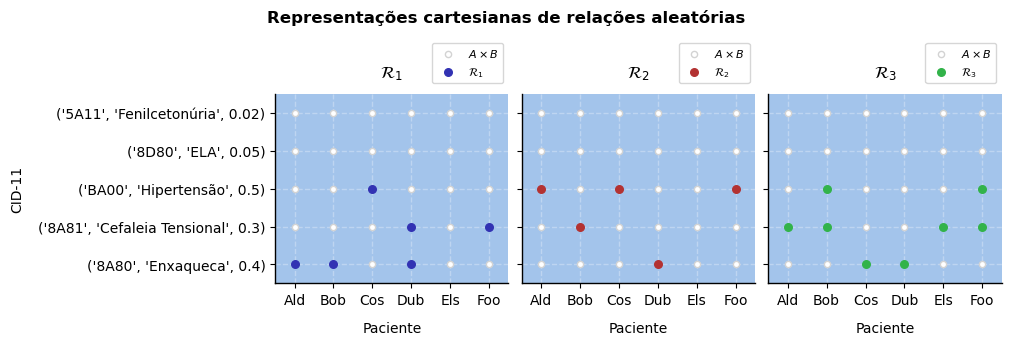

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd

pacientes = ["Ald", "Bob", "Cos", "Dub", "Els", "Foo"]

# Definindo outras doenças e chances de ocorrência
# código, nome, probabilidade de ocorrer (peso)
doencas = [
    ("8A80", "Enxaqueca", 0.4),          # Comum (40% de chance)
    ("8A81", "Cefaleia Tensional", 0.3), # Comum
    ("BA00", "Hipertensão", 0.5),        # Muito Comum
    ("8D80", "ELA", 0.05),               # Rara
    ("5A11", "Fenilcetonúria", 0.02)     # Muito Rara
]

cids = [d[0] for d in doencas]
nomes_doencas = [d[1] for d in doencas]
pesos = [d[2] for d in doencas]

# Criando relação aleatória 

nr = 3
fig, ax = plt.subplots(1,nr,figsize=(10, 3), sharey=True, constrained_layout=True)
col = ["#3232B3", "#B33232", "#32B34A"]

for i, a in enumerate(ax.flatten()):

    rnd.seed(42+i*100)

    Rel = []

    for paciente in pacientes:
        
        # Chances de 0 a 2 doenças por paciente
        qtd_doencas = rnd.choices([0, 1, 2], weights=[0.2, 0.6, 0.2], k=1)[0]
        
        if qtd_doencas > 0:
            # Escolhe doenças com base nas probabilidades
            # choices pode repetir elementos; set() para unicidade
            escolhidas = set(rnd.choices(cids, weights=pesos, k=qtd_doencas))
            
            for cid in escolhidas:
                Rel.append((paciente, cid))
    
    # Imprime relações           
    # print(f"R_{i}:")
    # print(*Rel,sep="\n")

    # Mapeando strings para índices
    x_indices = range(len(pacientes))
    y_indices = range(len(doencas))

    # Converter a relação (nomes) para coordenadas (x, y)
    coords_R = []
    for p, d in Rel:
        x = list(pacientes).index(p)
        y = cids.index(d)
        coords_R.append((x, y))

    
    # A x B
    X_grid, Y_grid = np.meshgrid(x_indices, y_indices)
    a.scatter(X_grid, Y_grid, s=20, color='white', marker='o', edgecolor='lightgray', label='$A \\times B$')

    # # Vértices
    xs_rel, ys_rel = zip(*coords_R)
    a.scatter(xs_rel, ys_rel, s=30, color=col[i], edgecolor=None, marker='o', zorder=10, label='$\\mathcal{R}_' + f'{i+1}$')

    a.set_xticks(x_indices)
    a.set_xticklabels(pacientes, fontsize=10, fontweight='normal')
    a.set_yticks(y_indices)
    a.set_yticklabels(doencas, fontsize=10)

    a.set_xlabel("Paciente", fontsize=10, labelpad=10)
    if i == 0:
        a.set_ylabel("CID-11", fontsize=10, labelpad=10)
    a.set_title("$\\mathcal{R}_" +f"{i+1}$", fontsize=12, pad=12, fontweight='bold')

    a.grid(True, linestyle='--', lw=1, alpha=0.3)
    a.set_xlim(-0.5, len(pacientes) - 0.5)
    a.set_ylim(-0.5, len(doencas) - 0.5)
        
    a.legend(loc='upper right', bbox_to_anchor=(1.0, 1.3), ncol=1, facecolor='none', fontsize=8);
    
fig.suptitle("Representações cartesianas de relações aleatórias", fontsize=12, fontweight='bold', y=1.1);


## Matriz de relacionamento

A representação de uma relação por meio de uma _matriz de relacionamento_ é, talvez, a forma mais poderosa de conectar a álgebra linear à matemática discreta e ao processamento de dados. Exibindo esta matriz como um _dataframe_, a primeira coluna (índices) equivalerá aos elementos de $A$. A primeira linha (variáveis) equivalerá aos elementos de $B$. Preenchemos as posições da matriz com o número 1 se as entradas que representam pares ordenados
pertencem à relação $\mathcal{R}$ e com 0 em caso contrário. 

Dessa maneira, transformamos associações abstratas em uma estrutura binária rígida, onde o valor 1 (ou `True`) indica a presença do vínculo $(a,b) \in \mathcal{R}$ e o 0 (ou `False`) a sua ausência. Essa "digitalização" da relação não apenas facilita a visualização imediata de padrões — como a identificação de comorbidades através de múltiplas marcações em uma mesma linha — mas também permite que o computador realize operações complexas de forma extremamente eficiente através de operações booleanas. 

Na prática, propriedades fundamentais como a simetria ou a composição de relações podem ser validadas e calculadas por meio de multiplicações matriciais, tornando a matriz de adjacência a espinha dorsal de algoritmos de busca e análise de grafos em sistemas de saúde em larga escala.

### Formalismo

Sendo $\mathcal{R}$ uma relação de $A = \{a_1, a_2, \dots, a_m\}$ para $B = \{b_1, b_2, \dots, b_n\}$. A matriz de relação $M_{\mathcal{R}}$ é uma matriz de ordem $m \times n$, ou $|A| \times |B|$, escrita como:

$$
M_{\mathcal{R}} = \begin{bmatrix}
m_{11} & m_{12} & \cdots & m_{1n} \\
m_{21} & m_{22} & \cdots & m_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
m_{m1} & m_{m2} & \cdots & m_{mn}
\end{bmatrix}
$$

Cada entrada $m_{ij}$ é a _função característica_ da relação, ou:

$$
m_{ij} = \begin{cases} 
1, & \text{se } (a_i, b_j) \in \mathcal{R} \\ 
0, & \text{se } (a_i, b_j) \notin \mathcal{R} 
\end{cases}
$$

```{admonition}Matriz de relacionamento x matriz de adjacência
Em outros contextos, é comum trabalharmos com o conceito de [_matriz de adjacência_](https://pt.wikipedia.org/wiki/Matriz_de_adjacência). Embora esses dois termos sejam usados quase como sinônimos em contextos básicos, existe uma condição estrutural específica para que uma matriz de relacionamento seja chamada de matriz de adjacência. A matriz de relacionamento é de adjacência quando a relação ocorre sobre um único conjunto, ou seja, de $A$ para $A$. Matematicamente, uma matriz de relacionamento pode ser retangular. Já a matriz de adjacência é, por definição, uma matriz quadrada de ordem $|A| \times |A|$. Isso será expandido ao estudarmos a teoria dos grafos.
```

### Construção a partir de _arrays_

Valendo-se de nosso mesmo escopo da área de saúde, podemos construir uma matriz de relacionamento diretamente com o `numpy`:

In [ ]:
import numpy as np

# R = {(P1, CID1), (P3, CID2)}
M_R = np.array([
    [1, 0], # Paciente 1 tem CID 1
    [0, 0], # Paciente 2 não tem nada
    [0, 1]  # Paciente 3 tem CID 2
])

print(f"Matriz de Relação:\n{M_R}")

Matriz de Relação:
[[1 0]
 [0 0]
 [0 1]]


Pacientes com comorbidadades poderiam, por exemplo, ser mapeados por uma matriz de relacionamento.

In [ ]:
import numpy as np

cids = ["8A80", "8A81.2", "8B00", "8D80.0", "5A11"]

matriz_comorbidade = np.array([
    [1, 1, 0, 0, 0],  # 8A80 se relaciona com ela mesma e com 8A81.2
    [1, 1, 0, 0, 0],  # 8A81.2 se relaciona com ela mesma e com 8A80 (Simetria)
    [0, 0, 1, 1, 0],  # 8B00 tem relação com 8D80.0
    [0, 0, 1, 1, 0],  # 8D80.0 tem relação com 8B00
    [0, 0, 0, 0, 1]   # 5A11 ocorre isoladamente
])

print("Matriz de Comorbidades:")
print(matriz_comorbidade)

# Verificando se existe relação entre Enxaqueca (índice 0) e AVC (índice 2)
if matriz_comorbidade[0, 2] == 0:
    print(f"\nMatematicamente: ({cids[0]}, {cids[2]}) ∉ R")

Matriz de Comorbidades:
[[1 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 1 0]
 [0 0 1 1 0]
 [0 0 0 0 1]]

Matematicamente: (8A80, 8B00) ∉ R


### Construção a partir de arquivos

Matriz de relacionamento poderiam ser construídas através de um _pipeline_ semi-ETL.

In [ ]:
import pandas as pd
import io

# Simula criação de arquivo CSV (dados de atendimento)
csv_cont = \
"""
paciente_id,cid_11
Ald,8A80
Ald,BA00
Bob,8D80.0
Cos,8A81.2
Dub,8A80
Els,9999
"""

# Criando o dataFrame a partir do CSV
df_atendimentos = pd.read_csv(io.StringIO(csv_cont))

# Transforma para matriz de relacionamento (cross-tabulation)
matriz_r = pd.crosstab(df_atendimentos['paciente_id'], df_atendimentos['cid_11'])

# Converte para valores binários (0 e 1)
# Caso um paciente tenha sido atendido 2 vezes com o mesmo CID, o crosstab contaria '2'.
# Como relações matemáticas são binárias, garantimos que seja apenas 0 ou 1.
matriz_rel = (matriz_r > 0).astype(int)

print("--- DataFrame: Matriz de Relacionamento M_R ---")
print(matriz_rel)

print("\n--- Verificação de Comorbidades ---")
# Se a soma da linha for > 1, o paciente tem comorbidades
comorbidades = matriz_rel.sum(axis=1)
print(f"Pacientes com mais de uma doença:\n{comorbidades[comorbidades > 1]}")

--- DataFrame: Matriz de Relacionamento M_R ---
cid_11       8A80  8A81.2  8D80.0  9999  BA00
paciente_id                                  
Ald             1       0       0     0     1
Bob             0       0       1     0     0
Cos             0       1       0     0     0
Dub             1       0       0     0     0
Els             0       0       0     1     0

--- Verificação de Comorbidades ---
Pacientes com mais de uma doença:
paciente_id
Ald    2
dtype: int64


### Construção a partir de consultas SQL

SQL (_Structured Query Language_) é a linguagem padrão universal para interagir com bancos de dados relacionais. Com `sqlite3`, temos uma implementação leve de SQL que roda diretamente em Python e é ideal para simular bancos de dados sem a necessidade de servidores externos. Dentro desse ambiente, executamos _queries_ (consultas), que são instruções lógicas para manipular dados. No exemplo a seguir, o comando `CREATE` estabelece a estrutura dos nossos conjuntos (as tabelas), enquanto o `INSERT` povoa esses conjuntos com elementos específicos (os pacientes e doenças). Para recuperar informações, utilizamos o `SELECT` para definir quais "colunas" ou atributos queremos visualizar, partindo do `FROM`, que indica o conjunto de origem. Por fim, a operação de `JOIN` permite-nos "atravessar" de uma tabela para outra através de uma chave comum.

In [ ]:
import sqlite3
import pandas as pd

# Criar conexão com um banco de dados em memória
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Cria tabelas e insere registros
cursor.executescript("""
CREATE TABLE Pacientes (id INTEGER PRIMARY KEY, nome TEXT);
CREATE TABLE Doencas (codigo TEXT PRIMARY KEY, nome_doenca TEXT);
CREATE TABLE Codigos (paciente_id INTEGER, cid_codigo TEXT);

INSERT INTO Pacientes VALUES (1, 'Ald'), (2, 'Bob'), (3, 'Cos');
INSERT INTO Doencas VALUES ('8A80', 'Enxaqueca'), ('BA00', 'Hipertensão');
INSERT INTO Codigos VALUES (1, '8A80'), (1, 'BA00'), (2, '8A80');
""")
conn.commit()

# Consulta de códigos associados a pacientes via JOIN
# P e R são aliases para as tabelas Pacientes e Codigos
query = """
SELECT P.nome, R.cid_codigo
FROM Pacientes P
JOIN Codigos R ON P.id = R.paciente_id
"""

# Lê a relação SQL para o ambiente Python/Pandas
df_relacao = pd.read_sql_query(query, conn)

# Transformando em matriz de relacionamento
matriz_rel = pd.crosstab(df_relacao['nome'], df_relacao['cid_codigo']).astype(int)

matriz_rel

cid_codigo,8A80,BA00
nome,,
Ald,1,1
Bob,1,0


## Propriedades das relações

As propriedades das relações definem o comportamento estrutural dos vínculos entre os elementos de um conjunto, permitindo classificar como os dados interagem entre si. Uma relação $\mathcal{R}$ sobre um dado conjunto pode ter as seguintes propriedades:

- _reflexividade_, se cada elemento se relaciona consigo mesmo, como em um sistema onde todo diagnóstico é compatível consigo mesmo. 
- _simetria_, se a existência de uma conexão em um sentido implica obrigatoriamente na existência do sentido oposto — essencial para modelar "comorbidades", onde se a doença $a$ ocorre com $b$, $b$ também ocorre com $a$. 
- _transitividade_, se há propagação de vínculos, tal como se $a$ relacionando-se com $b$ e $b$ com $c$, então $a$ deve se relacionar com $c$.

Além disso, diz-se que a relação é _antissimétrica_, se a reciprocidade de relação entre elementos distintos é impossível.Matematicamente, se $\mathcal{R}$ é uma relação em um conjunto $A$, então $\mathcal{R}$ é:

- _reflexiva_, se $\forall a \in A, (a, a) \in \mathcal{R}$.
- _simétrica_, se $\forall a, b \in A, (a, b) \in \mathcal{R} \implies (b, a) \in \mathcal{R}$.
- _transitiva_, se $\forall a, b, c \in A, ((a, b) \in \mathcal{R} \land (b, c) \in \mathcal{R}) \implies (a, c) \in \mathcal{R}$.
- _antissimétrica_, se $\forall a, b \in A, ((a, b) \in \mathcal{R} \land (b, a) \in \mathcal{R}) \implies a = b$.


In [ ]:
def testar_propriedades(A, R):    
    
    reflexiva = all((a, a) in R for a in A)
    simetrica = all((b, a) in R for (a, b) in R)        
    transitiva = True
    for (a, b) in R:
        for (c, d) in R:
            if b == c: # Se aRb e bRd
                if (a, d) not in R:
                    transitiva = False
                    break
    
    return {
        "Reflexiva": reflexiva,
        "Simétrica": simetrica,
        "Transitiva": transitiva
    }

# Exemplo aplicado: Relação de Comorbidade
doencas = {"8A80", "8A81.2", "8B00"}
relacao = {
    ("8A80", "8A80"), ("8A81.2", "8A81.2"), ("8B00", "8B00"), # Reflexiva
    ("8A80", "8A81.2"), ("8A81.2", "8A80")                   # Simétrica
}

resultados = testar_propriedades(doencas, relacao)
print("Análise da Relação:")
for prop, val in resultados.items():
    print(f"- {prop}: {True if val else False}")

Análise da Relação:
- Reflexiva: True
- Simétrica: True
- Transitiva: True


#### Representações visuais

Abaixo vemos exemplos de relações com as propriedades discutidas na subseção anterior. Além de notar que as propriedades só fazem sentido para relações homogêneas, isto é, apenas de um conjunto $A$ para consigo mesmo, chegamos às seguintes conclusões:

- na relação reflexiva, todo elemento se relaciona consigo mesmo. Existem _loops_ em todos os nós, já que $(a,a) \in \mathcal {R}, \forall a \in A$. 

```{mermaid}
graph LR
    subgraph A ["&nbsp;A (Reflexiva)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;"]
       A1("&nbsp;1&nbsp;<br/>&nbsp;")
       A2("&nbsp;2&nbsp;<br/>&nbsp;") 
       A3("&nbsp;3&nbsp;<br/>&nbsp;") 
    end

    %% Loops (Self-relationships)
    A1 --> A1
    A2 --> A2
    A3 --> A3

    %% Styling
    classDef node fill:#000,stroke:#333,stroke-width:0px,color:#fff,font-weight:normal;
    classDef domain fill:#fdd,stroke:#800,stroke-width:1px,color:#000,font-weight:bold;
    
    linkStyle 0,1,2 stroke:#000,stroke-width:2px;
    
    class A domain
    class A1,A2,A3 node
```

- na relação simétrica, haverá "vias de mão dupla", isto é, tanto $(a,b) \wedge (b,a) \in \mathcal {R}, \forall a \in A$.

```{mermaid}
graph LR
    subgraph A ["&nbsp;A (Simétrica)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;"]
       A1("&nbsp;1&nbsp;<br/>&nbsp;")
       A2("&nbsp;2&nbsp;<br/>&nbsp;") 
       A3("&nbsp;3&nbsp;<br/>&nbsp;") 
    end

    %% Bidirectional connection
    A1 --> A2
    A2 --> A1
    
    %% Elemento isolado (não quebra a simetria)
    A3

    classDef node fill:#000,stroke:#333,stroke-width:0px,color:#fff,font-weight:normal;
    classDef domain fill:#fdd,stroke:#800,stroke-width:1px,color:#000,font-weight:bold;
    
    linkStyle 0,1 stroke:#000,stroke-width:2px;
    
    class A domain
    class A1,A2,A3 node
```

- na relação transitiva, formam-se "atalhos". Por exemplo, Se 1 vai para 2, e 2 vai para 3, o 1 deve ir para o 3.

```{mermaid}
graph LR
    subgraph A ["&nbsp;A (Transitiva)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;"]
       A1("&nbsp;1&nbsp;<br/>&nbsp;")
       A2("&nbsp;2&nbsp;<br/>&nbsp;") 
       A3("&nbsp;3&nbsp;<br/>&nbsp;") 
    end

    A1 --> A2
    A2 --> A3
    
    %% O Atalho Obrigatório (Transitividade)
    A1 --> A3

    classDef node fill:#000,stroke:#333,stroke-width:0px,color:#fff,font-weight:normal;
    classDef domain fill:#fdd,stroke:#800,stroke-width:1px,color:#000,font-weight:bold;
    
    linkStyle 0,1 stroke:#000,stroke-width:2px;
    linkStyle 2 stroke:#00F,stroke-width:2px,stroke-dasharray: 5 5; 
    
    class A domain
    class A1,A2,A3 node
```

- na relação antissimétrica, só existem "caminhos de mão única".

```{mermaid}

graph LR
    subgraph A ["&nbsp;A (Antissimétrica)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;"]
       A1("&nbsp;1&nbsp;<br/>&nbsp;")
       A2("&nbsp;2&nbsp;<br/>&nbsp;") 
    end

    %% Apenas ida
    A1 --> A2
    %% A2 --> A1 %% Isso quebraria a antissimetria

    classDef node fill:#000,stroke:#333,stroke-width:0px,color:#fff,font-weight:normal;
    classDef domain fill:#fdd,stroke:#800,stroke-width:1px,color:#000,font-weight:bold;
    
    linkStyle 0 stroke:#000,stroke-width:2px;
    
    class A domain
    class A1,A2 node

```

### Relação inversa

A relação inversa de $\mathcal{R}$, denotada por $\mathcal{R}^{-1}$, é a relação de $B$ em $A$ dada por 

$$
\mathcal{R}^{-1} = \{(b, a)\ : \ (a, b)\in \mathcal{R}\} \subset B \times A.
$$

Na representação visual a seguir, $A=\{a,b,c,d\}$ e $B=\{1,2,3,4\}$.

```{mermaid}
graph RL        
   subgraph B ["&nbsp;B&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;"]
       B1("&nbsp;a&nbsp;<br/>&nbsp;")
       B2("&nbsp;b&nbsp;<br/>&nbsp;")
       B3("&nbsp;c&nbsp;<br/>&nbsp;")
       B4("&nbsp;d&nbsp;<br/>&nbsp;")
    end

    subgraph A ["&nbsp;A&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br/>&nbsp;"]
       A1("&nbsp;1&nbsp;<br/>&nbsp;") 
       A2("&nbsp;2&nbsp;<br/>&nbsp;")
       A3("&nbsp;3&nbsp;<br/>&nbsp;")
       A4("&nbsp;4&nbsp;<br/>&nbsp;")
    end
            
    B1 --> A1
    B2 --> A2
    B2 --> A3
    B3 --> A3
    
    %% Elemento 'd' mapeado de forma simples
    B4 --> A4

    %% Estilização
    classDef node fill:#000,stroke:#333,stroke-width:0px,color:#fff,font-weight:normal;
    
    %% B agora é vermelho (Domínio da Inversa)
    classDef domain fill:#fdd,stroke:#800,stroke-width:1px,color:#000,font-weight:bold;
    %% A agora é verde (Contradomínio da Inversa)
    classDef codomain fill:#dfd,stroke:#080,stroke-width:1px,color:#000,font-weight:bold;
    
    linkStyle 0,1,2,3,4 stroke:#000,stroke-width:2px;
    
    class B domain
    class A codomain
    class A1,A2,A3,A4,B1,B2,B3,B4 node

```

## Composição de relações

A composição de relações é uma operação similar a uma "ponte lógica" que nos permite saltar de um conjunto inicial para um destino final através de um elo intermediário. Imagine que temos uma relação $\mathcal{R}$, que vincula um paciente a um código CID-11, e uma segunda relação $\mathcal{S}$, que vincula esse código ao seu nome clínico. A composição de ambas as relações, denotada por $\mathcal{S} \circ \mathcal{R}$ cria um atalho direto, permitindo que o sistema administrativo de gestão identifique o diagnóstico final do paciente sem precisar lidar manualmente com os códigos técnicos no meio do caminho. 

Matematicamente, se $A$, $B$ e $C$ são conjuntos, $\mathcal{R}$ uma relação de $A$ em $B$ e $\mathcal{S}$ uma relação de $B$ em $C$, a relação composta entre $\mathcal{R}$ e $\mathcal{S}$ é a relação de $A$ em $C$ definida por:
$$
\mathcal{S} \circ \mathcal{R} = \{(a,c) \in A \times C \ : \ \exists b \in B, \, (a,b) \in \mathcal{R} \, \wedge \, (b,c) \in \mathcal{S} \}.
$$

Notemos que a composição deve ser interpretada de "trás para frente", ou de "dentro para fora". Primeiro ocorre $\mathcal{R}$, depois $\mathcal{S}$.


```{admonition}Curiosidade: Relações compostas no vôlei
:class: dropdown

Um ataque (_spike_) no vôlei é, na verdade, uma sucessão de relações matemáticas compostas. Na biomecânica, seria como uma _cadeia cinética_. Para que a mão atinja a bola com potência, o corpo do atleta realiza uma relação $\mathcal{R}$ (Impulso / Torque), em que a força gerada pela extensão das pernas e rotação do tronco ($A$) gera um torque nos ombros ($B$). Em seguida há uma relação $\mathcal{S}$ (Torque / Velocidade), em que o torque no ombro ($B$) é transferido para a aceleração do braço e extensão do cotovelo, chegando à velocidade da mão ($C$). Formalmente, a performance do atleta ao atacar é exatamente exibida como a relação composta $\mathcal{S} \circ \mathcal{R}$. 
```

Por exemplo, para $A = \{-1, 0, 1\}, B = \{1, 3\}, C = \{ \frac{3}{2}, \frac{5}{2}, 0 \}$, e as relações

$$
a \mathcal{R} b \Leftrightarrow \text{ a imagem de } a \text{ é seu quadrado}
$$
$$
b \mathcal{S} c \Leftrightarrow \text{ o correspondente de } b \text{ é sua metade aumentada em 1}
$$

Temos: 
$$
\mathcal{R} = \{ (-1,1), (1,1) \}
$$ 

$$
\mathcal{S} = \left\{ \left(1,\frac{3}{2} \right), \left(3,\frac{5}{2} \right) \right\}
$$

$$
\mathcal{S} \circ \mathcal{R} = \left\{ \left(-1,\frac{3}{2} \right), \left(1,\frac{3}{2} \right) \right\}
$$

A relação composta $\mathcal{S} \circ \mathcal{R} \subseteq A \times C$ está determinada por:
$$
(a,c) \in \mathcal{S} \circ \mathcal{R} \Leftarrow c = \frac{a^2}{2} + 1
$$ 



### Matrizes de relacionamento da composição

A operação de composição acima pode ser descrita por meio de matrizes, as quais, aplicadas uma sobre a outra, produzem o resultado final. A matriz 

$$
M_{\mathcal{R}} = \begin{pmatrix} 1 & 0 \\ 0 & 0 \\ 1 & 0 \end{pmatrix}
$$

mapeia de $A$ para $B$. Como temos 3 elementos na partida e 2 na chegada, a matriz é de ordem 3 x 2. Observe que a segunda linha é toda zero, pois o elemento $0 \in A$ não possui imagem em $B$.

A matriz 

$$
M_{\mathcal{S}} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}
$$

mapeia $B$ para $C$. Com 2 elementos na partida e 3 na chegada, a matriz é 2 x 3. Para obter a matriz da composição, realizamos o produto booleano das duas matrizes, que gera

$$
M_{\mathcal{S} \circ \mathcal{R}} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & 0 \\ 1 & 0 & 0 \end{pmatrix},
$$

uma matriz 3 x 3 que mapeia diretamente $A$ a $C$. Abaixo vemos como operar diretamente com essas matrizes para ter a composição.

In [ ]:
import numpy as np

M_R = np.array([
    [1, 0],  # -1 -> 1
    [0, 0],  #  0 não tem imagem
    [1, 0]   #  1 -> 1
])

M_S = np.array([
    [1, 0, 0],  # 1 -> 3/2
    [0, 1, 0]   # 3 -> 5/2
])

M_RS = M_R @ M_S

# Transformação em booleana
# Se o resultado for > 0, existe um caminho, logo o valor é 1
M_RS = (M_RS > 0).astype(int)

print("Matriz da Relação R (A -> B):")
print(M_R)
print("\nMatriz da Relação S (B -> C):")
print(M_S)
print("\nMatriz Resultante da Composição S ∘ R (A -> C):")
print(M_RS)

Matriz da Relação R (A -> B):
[[1 0]
 [0 0]
 [1 0]]

Matriz da Relação S (B -> C):
[[1 0 0]
 [0 1 0]]

Matriz Resultante da Composição S ∘ R (A -> C):
[[1 0 0]
 [0 0 0]
 [1 0 0]]


```{admonition}O operador JOIN
:class: dropdown

Um exemplo direto de composição é o operador `JOIN`, de SQL. Ele é a materialização do conceito de composição de relações. Enquanto na matemática discreta desenhamos flechas ligando conjuntos, no banco de dados utilizamos o `JOIN` para "atravessar" tabelas através de um elemento comum (a chave). Isto é, `JOIN` exerce justamente o papel do operador de composição ($\circ$).
```

In [ ]:
plt.rcdefaults()

## Exercícios aplicados resolvidos

**I.** As rotas de transferência de emergência entre 5 unidades de saúde, $H_0$ a $H_4$, podem ser representadas por matrizes de relacionamento. A auditoria dessa rede deve verificar se ela cumpre os seguintes requisitos regulatórios:

- Toda unidade deve ser capaz de "transferir" para si mesma (auto-atendimento).
- Toda unidade deve ter uma rota de ligação às outras (rede).
- Toda unidade $A$ com rota para $B$ e toda $B$ com rota para $C$ deve ter uma rota direta $A$ para $C$ (otimização de tempo).

Crie um script que audite essa rede para verificar se ela cumpre os requisitos regulatórios.

### Resolução

In [ ]:
import numpy as np

def audit(M):
    """Gera checklist de auditoria por verificação de propriedades da matriz de relacionamentos."""
    
    # O critério 1 é um teste de reflexividade (diagonal principal com 1s)
    reflexiva = np.all(np.diag(M) == 1)
    
    # O critério 2 é um teste de simetria (matriz vs. transposta)
    simetrica = np.array_equal(M, M.T)
    
    # O critério 3 é um teste de transitividade (produto booleano contido em M
    # Se (M @ M > 0) tem um 1 onde M tem 0, ela não é transitiva
    M_quadrado = (M @ M > 0).astype(int)
    transitiva = np.all((M_quadrado <= M))
    
    # Checklist
    audit_checklist =  {
        "Auto-atendimento (reflexividade)": reflexiva,
        "Rede (simetria)": simetrica,
        "Otimização (transitividade)": transitiva
    }

    return audit_checklist


def report(checklist):
    """Gera relatório de auditoria a partir do checklist."""
    
    print("## Relatório de Auditoria de Redes ##")
    for prop, status in checklist.items():
        print(f"- {prop}: {'PASS' if status else 'FAIL'}")

# Matriz de relacionamentos da rede
H = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 1, 1]
])

# Relatório
report(audit(H))

## Relatório de Auditoria de Redes ##
- Auto-atendimento (reflexividade): PASS
- Rede (simetria): PASS
- Otimização (transitividade): FAIL
